#  EDA for finding relationship between different oil properties

** Problem: "The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy). The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others." Finding oil by region characteristics **


**** modified datconomy tutorials****



## Loading data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
olive_oil=pd.read_csv('olive.csv')

# drop nan
olive_oil.dropna()
#replace nan
olive_oil.fillna(0)
olive_oil.head(2)



,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29


In [5]:
olive_oil.columns

Index(['Unnamed: 0', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic',
       'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'],
      dtype='object')

## Renaming columns

In [6]:
olive_oil.rename(columns={olive_oil.columns[0]:'area_idili'}, inplace = True)
olive_oil.head(5)

,area_idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


## Using split and map function in coumn name

In [8]:
# Editing area_idili column to have just region names - using split and map function
# olive_oil.area_idili[0].split('.')[1]
olive_oil.area_idili=olive_oil.area_idili.map(lambda x:x.split('.')[-1])
olive_oil.head(5)

,area_idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


## Normalizing Data 

In [11]:
# Dividing all values by 100 with apply(row/column wise) 
# or applymap( element wise) function

list_of_acids =olive_oil.columns[3:11]
df=olive_oil[list_of_acids].apply(lambda x:x/100.00)
df.head(3)

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,0.1075,0.0075,0.0226,0.7823,0.0672,0.0036,0.0060,0.0029
1,0.1088,0.0073,0.0224,0.7709,0.0781,0.0031,0.0061,0.0029
2,0.0911,0.0054,0.0246,0.8113,0.0549,0.0031,0.0063,0.0029


In [12]:
olive_oil[list_of_acids]=df
olive_oil.head(3)

,area_idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,0.1075,0.0075,0.0226,0.7823,0.0672,0.0036,0.0060,0.0029
1,North-Apulia,1,1,0.1088,0.0073,0.0224,0.7709,0.0781,0.0031,0.0061,0.0029
2,North-Apulia,1,1,0.0911,0.0054,0.0246,0.8113,0.0549,0.0031,0.0063,0.0029


## Finding unique regions and areas and their cross tabulation/relation

In [13]:
unique_region=olive_oil.region.unique()
unique_area=olive_oil.area.unique()
print(unique_region)
print(unique_area)
region_area=pd.crosstab(olive_oil.region,olive_oil.area)
print(region_area)

[1 2 3]
[1 2 3 4 5 6 9 7 8]
area     1   2    3   4   5   6   7   8   9
region                                     
1       25  56  206  36   0   0   0   0   0
2        0   0    0   0  65  33   0   0   0
3        0   0    0   0   0   0  50  50  51


## Vizualizing

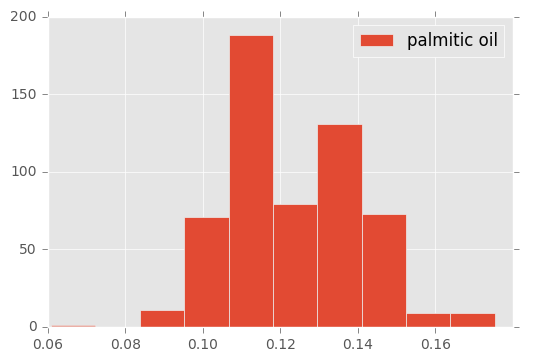

In [19]:
plt.style.use('ggplot')
plt.hist(olive_oil.palmitic,label='palmitic oil') # plot histogram
plt.legend()
plt.show() # Show the plot


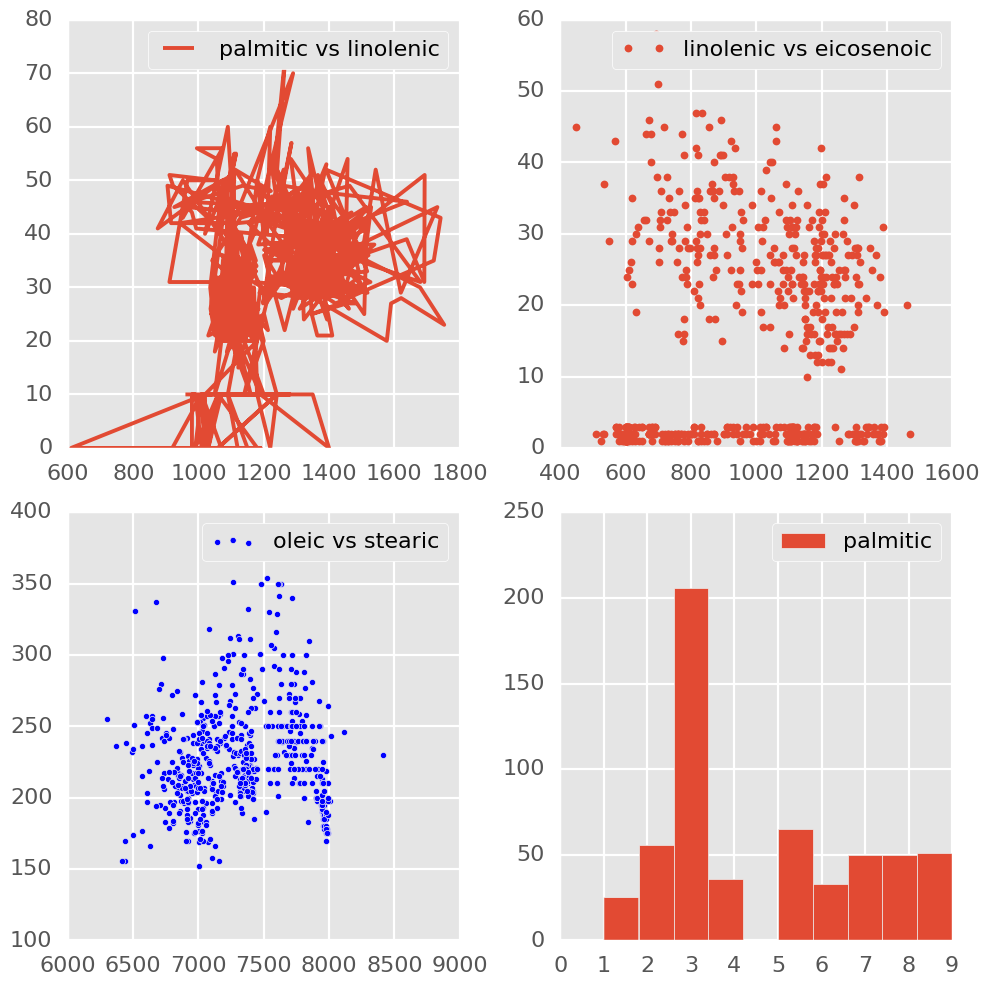

In [302]:
plt.style.use('ggplot')

fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(olive_oil.palmitic, olive_oil.linolenic,label='palmitic vs linolenic')
leg = axes[0][0].legend()
axes[0][1].plot(olive_oil.linoleic, olive_oil.eicosenoic, '.',label='linolenic vs eicosenoic')
leg = axes[0][1].legend()
axes[1][0].scatter(olive_oil.oleic, olive_oil.stearic,label='oleic vs stearic')
leg = axes[1][0].legend()
axes[1][1].hist(olive_oil.area,label='palmitic')
leg = axes[1][1].legend()
fig.tight_layout()
plt.show()



## Grouping by regions and taking mean and Std
Using groupby: There are 3 regions and 9 areas for all the oilve oils, groupong each oil by region


In [20]:
oga=olive_oil.groupby("region")
oga.describe()

arachidic        area  eicosenoic    linoleic   linolenic  \
region                                                                     
1      count  323.000000  323.000000  323.000000  323.000000  323.000000   
       mean     0.006312    2.783282    0.002732    0.103350    0.003807   
       std      0.001116    0.741054    0.000839    0.021067    0.000797   
       min      0.003200    1.000000    0.001000    0.044800    0.002000   
       25%      0.005600    2.500000    0.002200    0.085550    0.003200   
       50%      0.006200    3.000000    0.002700    0.109000    0.003700   
       75%      0.006900    3.000000    0.003200    0.120250    0.004400   
       max      0.010200    4.000000    0.005800    0.146200    0.007400   
2      count   98.000000   98.000000   98.000000   98.000000   98.000000   
       mean     0.007317    5.336735    0.000194    0.119653    0.002709   
       std      0.001188    0.475023    0.000074    0.010723    0.000538   
       min      0.004500    5.000000    0.000100    0.105700    0.001500   
       25%      0.006600    5.000000    0.000100    0.111225    0.002300   
       50%      0.007200    5.000000    0.000200    0.114650    0.002700   
       75%      0.008100    6.000000    0.000200    0.130650    0.003000   
       max      0.010500    6.000000    0.000300    0.147000    0.004300   
3      count  151.000000  151.000000  151.000000  151.000000  151.000000   
       mean     0.003758    8.006623    0.000197    0.072703    0.002179   
       std      0.002936    0.820542    0.000073    0.014312    0.001689   
       min      0.000000    7.000000    0.000100    0.051000    0.000000   
       25%      0.001000    7.000000    0.000100    0.060200    0.001000   
       50%      0.003800    8.000000    0.000200    0.068000    0.002000   
       75%      0.005950    9.000000    0.000250    0.082500    0.003500   
       max      0.010000    9.000000    0.000300    0.105000    0.007000   

                   oleic    palmitic  palmitoleic     stearic  
region                                                         
1      count  323.000000  323.000000   323.000000  323.000000  
       mean     0.710001    0.133229     0.015480    0.022877  
       std      0.034514    0.015293     0.005072    0.003987  
       min      0.630000    0.087500     0.003500    0.015200  
       25%      0.688300    0.126800     0.012150    0.020150  
       50%      0.703000    0.134600     0.016300    0.022300  
       75%      0.728350    0.141900     0.018500    0.024950  
       max      0.811300    0.175300     0.028000    0.037500  
2      count   98.000000   98.000000    98.000000   98.000000  
       mean     0.726802    0.111135     0.009674    0.022618  
       std      0.014188    0.004041     0.001385    0.001764  
       min      0.688200    0.103000     0.003500    0.019900  
       25%      0.713725    0.108525     0.008825    0.021200  
       50%      0.732550    0.110750     0.009600    0.022200  
       75%      0.738100    0.113725     0.010400    0.023950  
       max      0.743900    0.121300     0.013500    0.027200  
3      count  151.000000  151.000000   151.000000  151.000000  
       mean     0.779305    0.109480     0.008374    0.023080  
       std      0.016482    0.008256     0.002644    0.003896  
       min      0.734000    0.061000     0.001500    0.017000  
       25%      0.768000    0.106000     0.006900    0.020000  
       50%      0.780000    0.109000     0.008000    0.023000  
       75%      0.795000    0.112500     0.010000    0.025000  
       max      0.841000    0.140000     0.018000    0.035000

In [23]:
ooMean=oga.mean()
renamed_dict={k: k+"_mean" for k in list_of_acids}
ooMean.rename(columns=renamed_dict, inplace=True)
ooMean

,area,palmitic_mean,palmitoleic_mean,stearic_mean,oleic_mean,linoleic_mean,linolenic_mean,arachidic_mean,eicosenoic_mean
region,,,,,,,,,
1,2.783282,0.133229,0.015480,0.022877,0.710001,0.103350,0.003807,0.006312,0.002732
2,5.336735,0.111135,0.009674,0.022618,0.726802,0.119653,0.002709,0.007317,0.000194
3,8.006623,0.109480,0.008374,0.023080,0.779305,0.072703,0.002179,0.003758,0.000197


In [24]:
ooStd=oga.std()
renamed_dict={k: k+"_std" for k in list_of_acids}
ooStd.rename(columns=renamed_dict,inplace=True)
ooStd

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,0.015293,0.005072,0.003987,0.034514,0.021067,0.000797,0.001116,0.000839
2,0.475023,0.004041,0.001385,0.001764,0.014188,0.010723,0.000538,0.001188,0.000074
3,0.820542,0.008256,0.002644,0.003896,0.016482,0.014312,0.001689,0.002936,0.000073
